In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [180]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [181]:
house=pd.read_csv('/Users/dylanbai/Desktop/Data Science/Assignments/kc_house_data.csv')

In [182]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [183]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [184]:
house.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [185]:
house['date']=pd.to_datetime(house['date'])
house['year_built']=pd.to_datetime(house['yr_built'])


In [186]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [187]:
house.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,1970-01-01 00:00:00.000001971
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1970-01-01 00:00:00.000001900
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,1970-01-01 00:00:00.000001951
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,1970-01-01 00:00:00.000001975
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1970-01-01 00:00:00.000001997
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1970-01-01 00:00:00.000002015
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,NaN


<Axes: ylabel='bedrooms'>

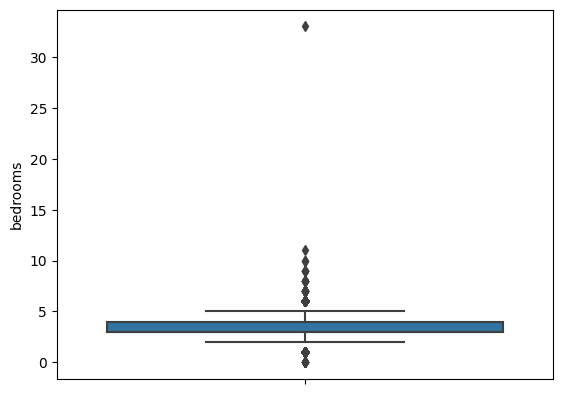

In [188]:
# from the informations above, we can use sns to see if there are outliers.
# from the bedroom plot, we can define there is one outliers where the number of bedrooms are 33.
sns.boxplot(data=house,y='bedrooms')

In [189]:
bedrooms_outliers=house[house['bedrooms']>30].index
bedrooms_outliers

Index([15870], dtype='int64')

In [190]:
house.drop(bedrooms_outliers,inplace=True)

<Axes: ylabel='sqft_living'>

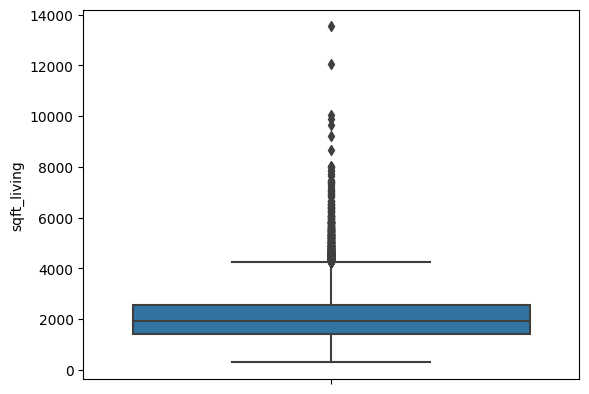

In [191]:
sns.boxplot(data=house,y='sqft_living')

In [192]:
sqft_living_outliers=house[house['sqft_living']>12000].index
sqft_living_outliers

Index([7252, 12777], dtype='int64')

In [193]:
house.drop(sqft_living_outliers,inplace=True)

<Axes: ylabel='sqft_basement'>

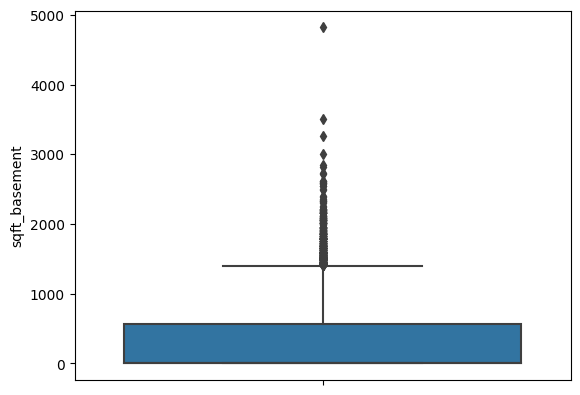

In [194]:
sns.boxplot(data=house,y='sqft_basement')

In [195]:
sqft_basement_outliers=house[house['sqft_basement']>4000].index
sqft_basement_outliers

Index([8092], dtype='int64')

In [196]:
house.drop(sqft_basement_outliers,inplace=True)

<Axes: ylabel='sqft_living15'>

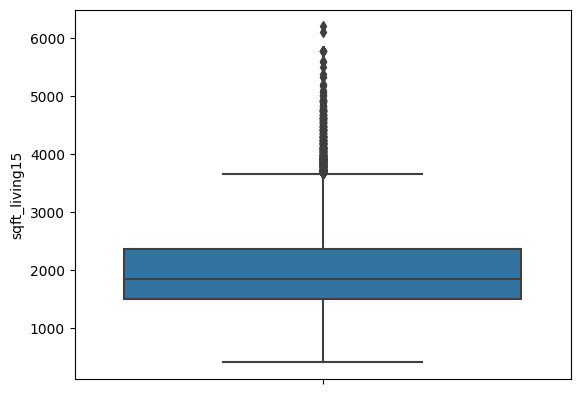

In [197]:
sns.boxplot(data=house,y='sqft_living15')

<Axes: ylabel='sqft_lot15'>

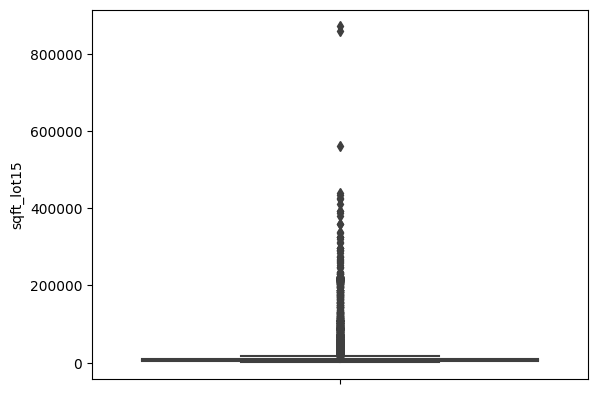

In [198]:
sns.boxplot(data=house,y='sqft_lot15')

In [199]:
sqft_lot15_outliers=house[house['sqft_lot15']>800000].index
sqft_lot15_outliers

Index([9714, 20452], dtype='int64')

In [200]:
house.drop(sqft_lot15_outliers,inplace=True)

In [201]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21607 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21607 non-null  int64         
 1   date           21607 non-null  datetime64[ns]
 2   price          21607 non-null  float64       
 3   bedrooms       21607 non-null  int64         
 4   bathrooms      21607 non-null  float64       
 5   sqft_living    21607 non-null  int64         
 6   sqft_lot       21607 non-null  int64         
 7   floors         21607 non-null  float64       
 8   waterfront     21607 non-null  int64         
 9   view           21607 non-null  int64         
 10  condition      21607 non-null  int64         
 11  grade          21607 non-null  int64         
 12  sqft_above     21607 non-null  int64         
 13  sqft_basement  21607 non-null  int64         
 14  yr_built       21607 non-null  int64         
 15  yr_renovated   21607 non

In [202]:
house.drop_duplicates(inplace=True)

In [203]:
house.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built
count,2.160700e+04,21607,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,...,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607
mean,4.580941e+09,2014-10-29 04:52:26.313694976,5.394131e+05,3.369047,2.113771,2078.212987,1.501412e+04,1.494192,0.007498,0.233767,...,1787.314898,290.898089,1971.004026,84.240755,98077.946360,47.560028,-122.213928,1986.266904,12680.776878,1970-01-01 00:00:00.000001971
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1970-01-01 00:00:00.000001900
25%,2.123050e+09,2014-07-22 00:00:00,3.215000e+05,3.000000,1.750000,1423.500000,5.040000e+03,1.000000,0.000000,0.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000,1970-01-01 00:00:00.000001951
50%,3.904931e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,1970-01-01 00:00:00.000001975
75%,7.309000e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068300e+04,2.000000,0.000000,0.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10081.500000,1970-01-01 00:00:00.000001997
max,9.900000e+09,2015-05-27 00:00:00,7.062500e+06,11.000000,7.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,...,8860.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,560617.000000,1970-01-01 00:00:00.000002015
std,2.876492e+09,NaN,3.625715e+05,0.907486,0.767081,910.471514,4.055009e+04,0.539880,0.086265,0.765238,...,824.294958,440.103968,29.371488,401.311220,53.507505,0.138573,0.140799,684.924160,26011.256369,NaN


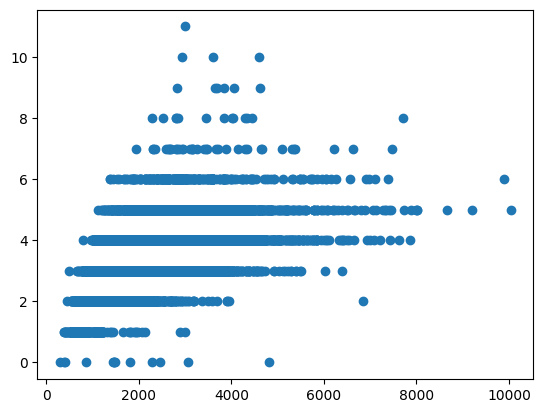

In [204]:
plt.scatter(house['sqft_living'],house['bedrooms'])

In [205]:
zipcode_df=house['zipcode'].nunique()
print(zipcode_df)

70


In [206]:
zipcode_mean_price = house.groupby('zipcode')['price'].mean()
house['zipcode_encoded'] = house['zipcode'].map(zipcode_mean_price)
print(house[['zipcode','zipcode_encoded']])

       zipcode  zipcode_encoded
0        98178    310612.755725
1        98125    469455.770732
2        98028    462480.035336
3        98136    551688.673004
4        98074    685605.775510
...        ...              ...
21608    98103    584827.562396
21609    98146    359483.239583
21610    98144    594547.650146
21611    98027    616990.592233
21612    98144    594547.650146

[21607 rows x 2 columns]


In [207]:
results = ols("price ~ bedrooms + sqft_living + zipcode_encoded", data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 1.722e+04
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:09:32   Log-Likelihood:            -2.9405e+05
No. Observations:               21607   AIC:                         5.881e+05
Df Residuals:                   21603   BIC:                         5.881e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.172e+05   5745.068    -

# from the ols results, the large condition number indicates the strong multicollinearity,we should adjust the variable. Let's see the correlation between the varibles:


In [208]:
correlation=house[['sqft_living','bedrooms']].corr()
print(correlation)
# from the result, the correlation is 0.59>0.5, indicating there is some kind of correlation btween sqft_living and bedrooms.

             sqft_living  bedrooms
sqft_living     1.000000  0.592348
bedrooms        0.592348  1.000000


In [209]:
correlation=house[['sqft_living','zipcode_encoded']].corr()
print(correlation)
# from the result，the correlation is 0.30 < 0.5,indicating the correlation between sqrt_living and zipcode is weaker.

                 sqft_living  zipcode_encoded
sqft_living         1.000000         0.299147
zipcode_encoded     0.299147         1.000000


In [210]:
correlation=house[['sqft_living','date']].corr()
print(correlation)
# from the result, the correlation is 0.034 < 0.5,indicating variable 'sqft_living' and'date' are independent

             sqft_living      date
sqft_living     1.000000 -0.033901
date           -0.033901  1.000000


In [211]:
correlation=house[['date','zipcode_encoded']].corr()
print(correlation)
# from the result, the correlation is 0.039 < 0.5,indicating variable 'zipcode' and'date' are independent

                    date  zipcode_encoded
date             1.00000         -0.03941
zipcode_encoded -0.03941          1.00000


In [212]:
correlation=house[['yr_built','sqft_living']].corr()
print(correlation)
#from the result，the correlation is 0.32 < 0.5,indicating the correlation between yr_built and sqft_living is weaker.

             yr_built  sqft_living
yr_built     1.000000     0.320787
sqft_living  0.320787     1.000000


In [213]:
correlation=house[['view','zipcode_encoded']].corr()
print(correlation)
#from the result，the correlation is 0.099 < 0.5,indicating the correlation between view and zipcode is weak.

                     view  zipcode_encoded
view             1.000000         0.099193
zipcode_encoded  0.099193         1.000000


In [214]:
correlation=house[['yr_built','date']].corr()
print(correlation)
#from the result，the correlation is 0.0004< 0.5,indicating the correlation between yr_built and date is weak.

          yr_built      date
yr_built  1.000000 -0.000438
date     -0.000438  1.000000


<Axes: >

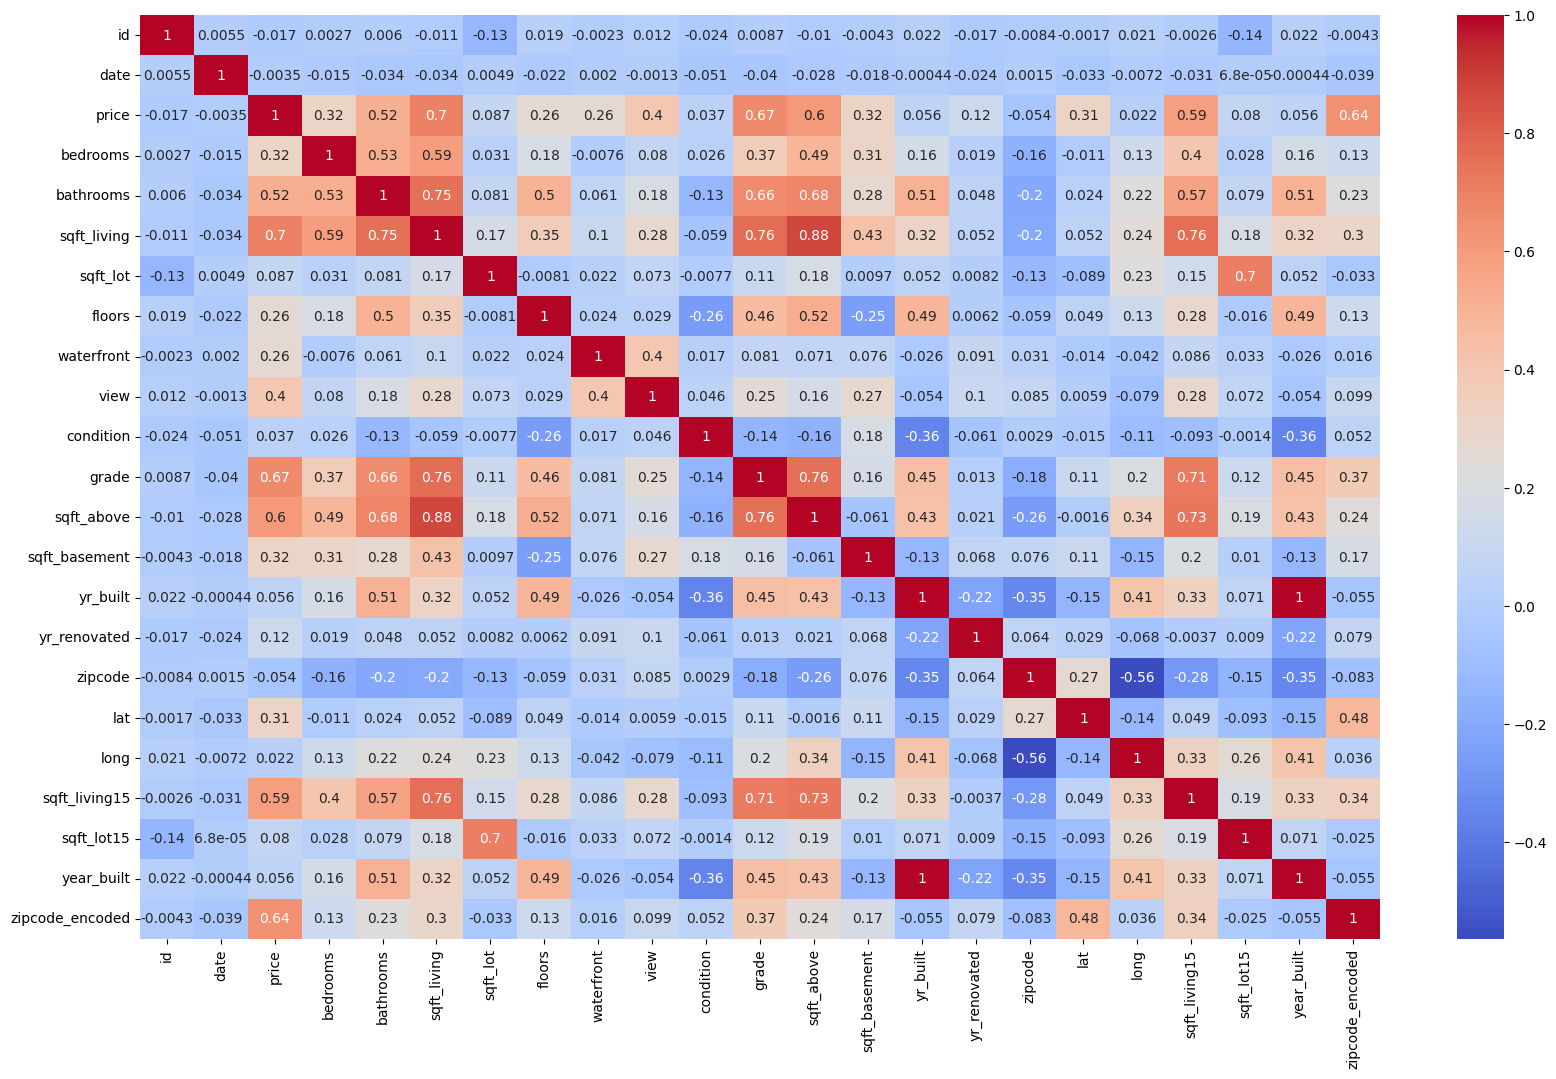

In [215]:
plt.figure(figsize=(20,12))
sns.heatmap(house.corr(),cmap='coolwarm',annot=True)

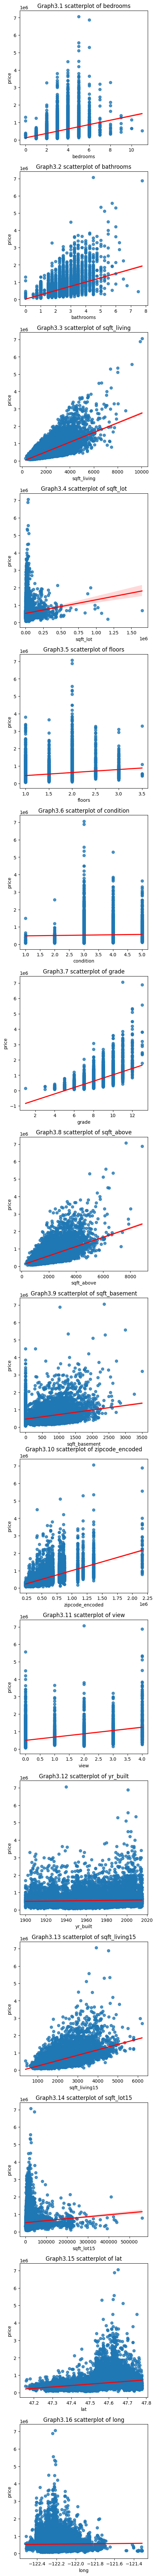

In [216]:
# Examine the relationship through scatterplot and regresssion line
feature = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade',\
           'sqft_above','sqft_basement','zipcode_encoded','view','yr_built','sqft_living15','sqft_lot15','lat','long']
x=0
fig, axes = plt.subplots(nrows=16, ncols=1, figsize=(5, 100))
for i in feature:
    sns.regplot(data=house, y='price', x=i, line_kws={'color':'red'}, ax=axes[x])
    x += 1
y=1
for i in axes:
    i.set_title(f"Graph3.{y} scatterplot of {feature[y-1]}")
    y += 1

# from the informations above, we can see the 'condition','long','yr_built' don't have much impact on the price.

In [217]:
results = ols("price ~ grade+ sqft_living + zipcode_encoded", data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 1.745e+04
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:09:43   Log-Likelihood:            -2.9396e+05
No. Observations:               21607   AIC:                         5.879e+05
Df Residuals:                   21603   BIC:                         5.880e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -6.01e+05   1.04e+04    -

In [242]:
# the model indicates the strong multicollinearity,so maybe we should transfrom the sqrt_living
house['sqft_living_log'] = np.log(house['sqft_living'])

In [248]:
# Create function to define what level is the house been renovated,the latest of the year, the newest.
def total_cat(x):
    if x > 2010:
        return 4
    elif x > 2000 and x <= 2010:
        return 3
    elif x > 1980 and x <= 2000:
        return 2
    elif x > 0 and x <= 1980:
        return 1
    elif x == 0:
        return 0
    else:
        return 'null'
    
house['new_renovated'] = house['yr_renovated'].apply(total_cat)

In [250]:
results = ols("price ~ view+ sqft_living_log + new_renovated ", data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     5774.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:13:46   Log-Likelihood:            -3.0089e+05
No. Observations:               21607   AIC:                         6.018e+05
Df Residuals:                   21603   BIC:                         6.018e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.022e+06   3.37e+04    -

In [251]:
"y_hat= -3.022e+06+1.212e+05view+4.672e+05sqft_living_log+4.809e+04new_renovated"

'y_hat= -3.022e+06+1.212e+05view+4.672e+05sqft_living_log+4.809e+04new_renovated'

In [252]:
pred_vals=results.predict(house[['view','sqft_living_log','new_renovated']])

In [253]:
pred_vals

0        283252.868366
1        743124.103759
2         83795.747290
3        520346.953208
4        448320.837571
             ...      
21608    404621.265978
21609    597116.712414
21610    215169.770882
21611    425523.883252
21612    215169.770882
Length: 21607, dtype: float64

In [254]:
res=pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),house['price']],axis=1)

In [255]:
res

,y_hat,price
0,283252.868366,221900.0
1,743124.103759,538000.0
2,83795.747290,180000.0
3,520346.953208,604000.0
4,448320.837571,510000.0
...,...,...
21608,404621.265978,360000.0
21609,597116.712414,400000.0
21610,215169.770882,402101.0
21611,425523.883252,400000.0


In [256]:
res['error'] = res['y_hat'] - res['price']

In [257]:
res.head(1)

,y_hat,price,error
0,283252.868366,221900.0,61352.868366


In [258]:
res['sq_error'] = res['error']**2

In [259]:
np.sqrt(res['sq_error'].mean())

270097.5151127823

(array([2.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 9.000e+00, 4.000e+01,
        1.210e+02, 7.450e+02, 1.681e+04, 3.873e+03]),
 array([-5392111.17705015, -4770587.94244375, -4149064.70783735,
        -3527541.47323095, -2906018.23862456, -2284495.00401816,
        -1662971.76941176, -1041448.53480536,  -419925.30019896,
          201597.93440743,   823121.16901383]),
 <BarContainer object of 10 artists>)

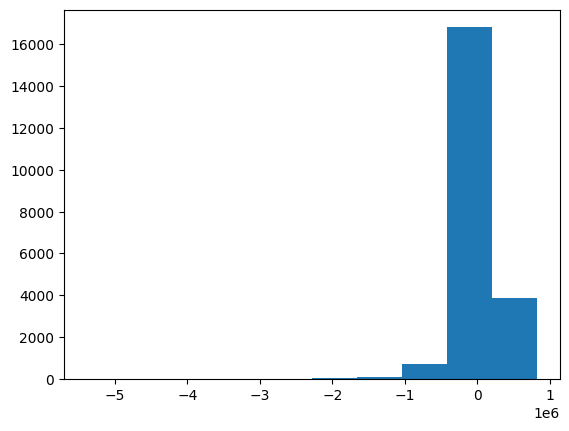

In [260]:
plt.hist(res['error'])

(array([1.8285e+04, 2.7700e+03, 3.7900e+02, 1.0900e+02, 4.5000e+01,
        1.1000e+01, 2.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  75000.,  773750., 1472500., 2171250., 2870000., 3568750.,
        4267500., 4966250., 5665000., 6363750., 7062500.]),
 <BarContainer object of 10 artists>)

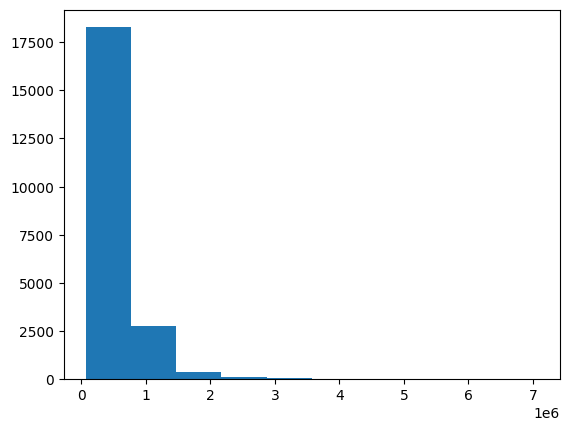

In [261]:
plt.hist(house['price'])

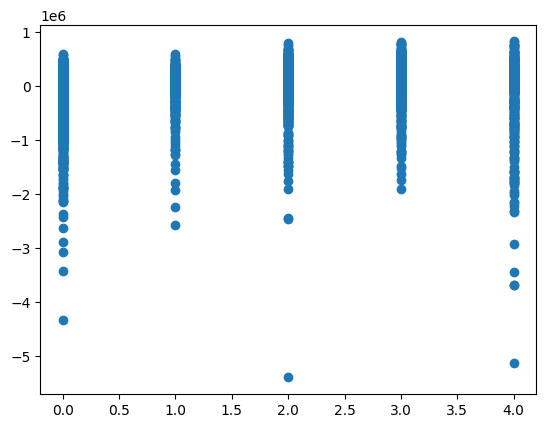

In [262]:
plt.scatter(house['view'],res['error'])

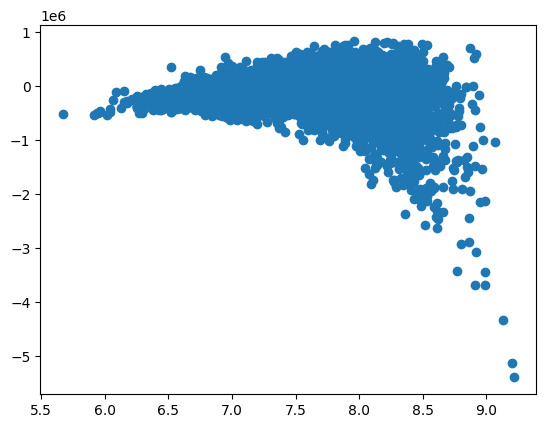

In [263]:
plt.scatter(house['sqft_living_log'],res['error'])

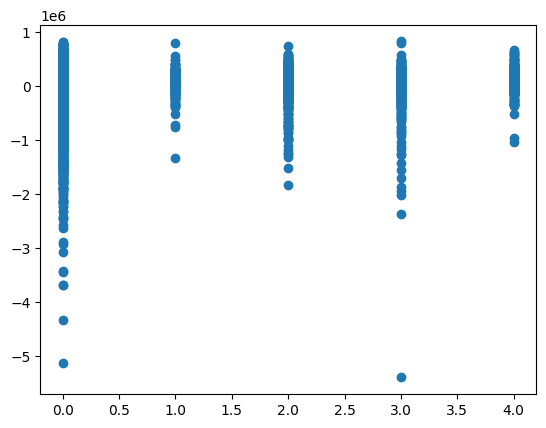

In [264]:
plt.scatter(house['new_renovated'],res['error'])

((array([-3.99696983, -3.78174326, -3.66401218, ...,  3.66401218,
          3.78174326,  3.99696983]),
  array([-5392111.17705015, -5123424.650926  , -4327171.44345557, ...,
           804703.08402744,   810679.78273399,   823121.16901383])),
 (243325.62785505233, 1.405138835087222e-08, 0.9007202600504897))

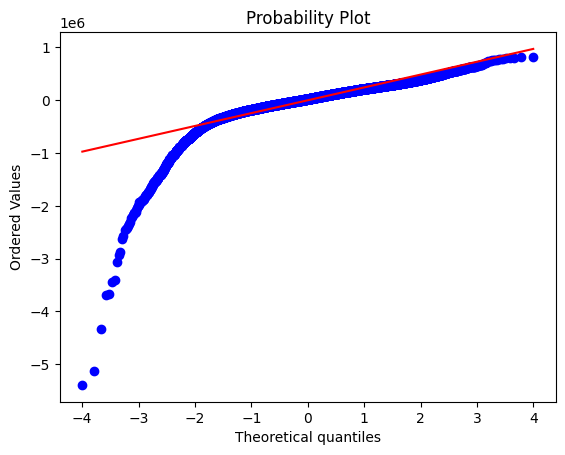

In [265]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [266]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_view  dfb_sqft_living_log  dfb_new_renovated   
0          -0.001756  0.000033             0.001664           0.000209  \
1           0.003457  0.003916            -0.003602          -0.018221   
2           0.005267  0.000556            -0.005127          -0.000247   
3          -0.000202 -0.000673             0.000331          -0.000369   
4           0.000433 -0.000355            -0.000338          -0.000253   
...              ...       ...                  ...                ...   
21608      -0.000568  0.000195             0.000500           0.000175   
21609       0.002456  0.002064            -0.002765           0.000933   
21610       0.007018  0.000302            -0.006741          -0.000584   
21611      -0.000255  0.000129             0.000216           0.000102   
21612       0.004123  0.000178            -0.003960          -0.000343   

            cooks_d  standard_resid  hat_diag  dffits_internal  student_resid   
0      1.362646e-06       -0.2

In [267]:
infl.summary_frame()

,dfb_Intercept,dfb_view,dfb_sqft_living_log,dfb_new_renovated,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.001756,0.000033,0.001664,0.000209,1.362646e-06,-0.227142,0.000106,-0.002335,-0.227137,-0.002335
1,0.003457,0.003916,-0.003602,-0.018221,9.469562e-05,-0.759624,0.000656,-0.019462,-0.759616,-0.019462
2,0.005267,0.000556,-0.005127,-0.000247,8.219714e-06,0.356197,0.000259,0.005734,0.356189,0.005734
3,-0.000202,-0.000673,0.000331,-0.000369,1.272919e-06,0.309694,0.000053,0.002256,0.309687,0.002256
4,0.000433,-0.000355,-0.000338,-0.000253,7.056838e-07,0.228344,0.000054,0.001680,0.228339,0.001680
...,...,...,...,...,...,...,...,...,...,...
21608,-0.000568,0.000195,0.000500,0.000175,4.169625e-07,-0.165194,0.000061,-0.001291,-0.165190,-0.001291
21609,0.002456,0.002064,-0.002765,0.000933,8.827162e-06,-0.729755,0.000066,-0.005942,-0.729747,-0.005942
21610,0.007018,0.000302,-0.006741,-0.000584,1.757935e-05,0.692075,0.000147,0.008386,0.692066,0.008385
21611,-0.000255,0.000129,0.000216,0.000102,1.276398e-07,-0.094493,0.000057,-0.000715,-0.094491,-0.000715


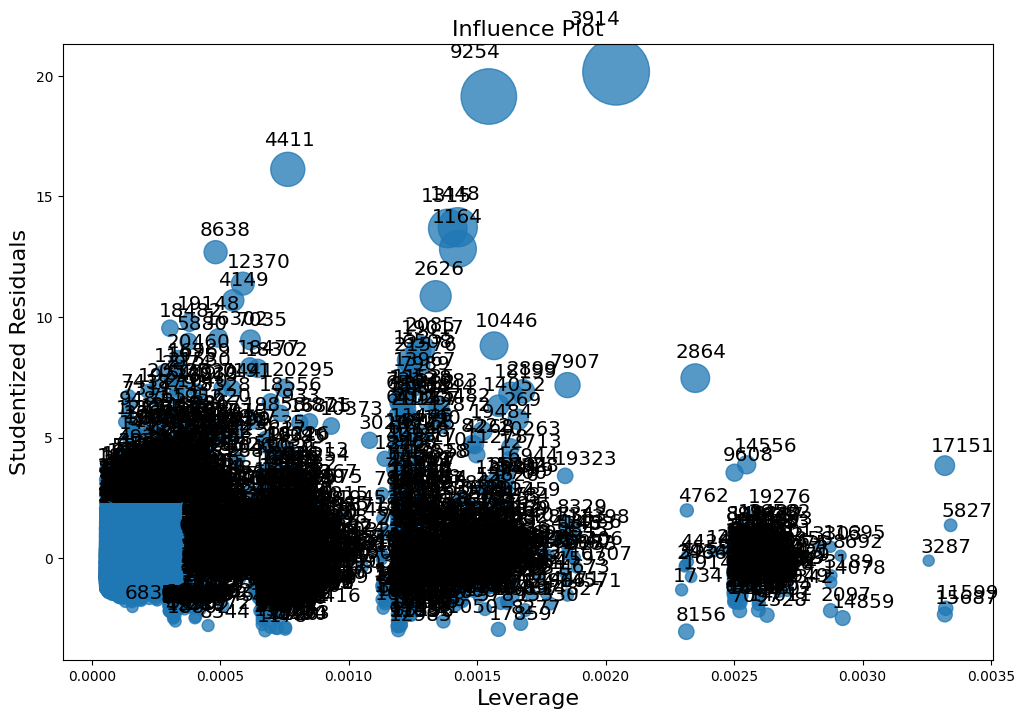

In [268]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [289]:
house=house.drop([9254,3914],axis=0)

In [291]:
results = ols("price ~ view+ sqft_living_log + new_renovated +condition", data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     4451.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:38:51   Log-Likelihood:            -3.0041e+05
No. Observations:               21605   AIC:                         6.008e+05
Df Residuals:                   21600   BIC:                         6.009e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.126e+06   3.49e+04    -

In [292]:
"y_hat= -3.152e+06+1.194e+05view+4.702e+05sqft_living_log+5.108e+04new_renovated+3.178e+04condition"

'y_hat= -3.152e+06+1.194e+05view+4.702e+05sqft_living_log+5.108e+04new_renovated+3.178e+04condition'

In [293]:
pred_vals=results.predict(house[['view','sqft_living_log','new_renovated','condition']])

In [294]:
pred_vals

0        270652.147715
1        731973.607243
2         71472.500656
3        571617.674928
4        435490.483242
             ...      
21608    391851.704142
21609    584079.361269
21610    202663.763774
21611    412725.242819
21612    202663.763774
Length: 21605, dtype: float64

In [295]:
res=pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),house['price']],axis=1)

In [296]:
res

,y_hat,price
0,270652.147715,221900.0
1,731973.607243,538000.0
2,71472.500656,180000.0
3,571617.674928,604000.0
4,435490.483242,510000.0
...,...,...
21608,391851.704142,360000.0
21609,584079.361269,400000.0
21610,202663.763774,402101.0
21611,412725.242819,400000.0


In [297]:
res['error'] = res['y_hat'] - res['price']

In [298]:
res['sq_error'] = res['error']**2

In [299]:
np.sqrt(res['sq_error'].mean())

264501.0044966162

(array([1.0000e+00, 4.0000e+00, 3.0000e+00, 8.0000e+00, 2.9000e+01,
        8.1000e+01, 2.2800e+02, 2.0830e+03, 1.7608e+04, 1.5600e+03]),
 array([-4341107.07418041, -3827117.73801546, -3313128.40185051,
        -2799139.06568556, -2285149.7295206 , -1771160.39335565,
        -1257171.0571907 ,  -743181.72102575,  -229192.38486079,
          284796.95130416,   798786.28746911]),
 <BarContainer object of 10 artists>)

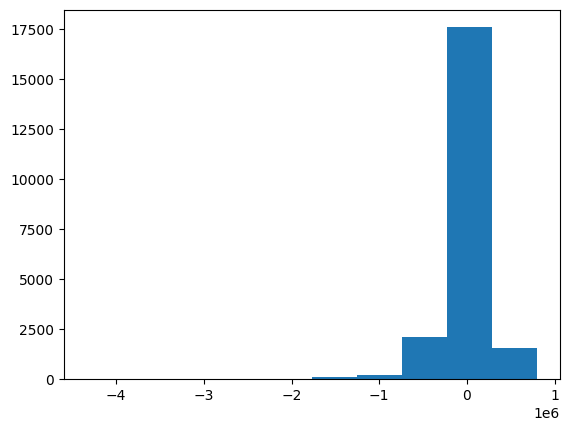

In [300]:
plt.hist(res['error'])

((array([-3.99694791, -3.78172022, -3.66398849, ...,  3.66398849,
          3.78172022,  3.99694791]),
  array([-4341107.07418041, -3715456.92680974, -3670363.70487976, ...,
           779873.87655969,   786825.28542657,   798786.28746911])),
 (240637.0207863816, 3.687786121849765e-09, 0.9096153435732319))

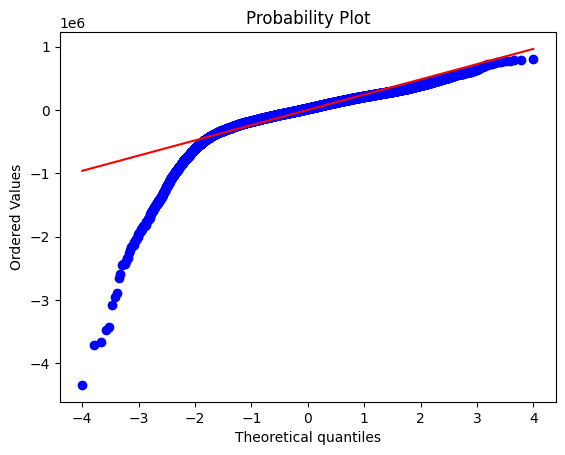

In [301]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [302]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_view  dfb_sqft_living_log  dfb_new_renovated   
0          -0.001633 -0.000030             0.001400           0.000238  \
1           0.002690  0.003671            -0.003400          -0.017441   
2           0.006427  0.000773            -0.006023          -0.000453   
3          -0.000749 -0.000401             0.000252           0.000015   
4           0.000910 -0.000356            -0.000490          -0.000408   
...              ...       ...                  ...                ...   
21608      -0.000568  0.000107             0.000396           0.000170   
21609       0.001285  0.001775            -0.002466           0.001107   
21610       0.008431  0.000565            -0.007551          -0.000927   
21611      -0.000193  0.000051             0.000123           0.000069   
21612       0.005172  0.000347            -0.004632          -0.000568   

       dfb_condition       cooks_d  standard_resid  hat_diag  dffits_internal   
0           0.000872  8.704186

In [303]:
infl.summary_frame()

,dfb_Intercept,dfb_view,dfb_sqft_living_log,dfb_new_renovated,dfb_condition,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.001633,-0.000030,0.001400,0.000238,0.000872,8.704186e-07,-0.184308,0.000128,-0.002086,-0.184304,-0.002086
1,0.002690,0.003671,-0.003400,-0.017441,0.001461,7.116736e-05,-0.733514,0.000661,-0.018864,-0.733507,-0.018863
2,0.006427,0.000773,-0.006023,-0.000453,-0.002113,9.626324e-06,0.410322,0.000286,0.006938,0.410314,0.006938
3,-0.000749,-0.000401,0.000252,0.000015,0.002057,1.005373e-06,0.122434,0.000335,0.002242,0.122432,0.002242
4,0.000910,-0.000356,-0.000490,-0.000408,-0.001236,1.164929e-06,0.281676,0.000073,0.002413,0.281670,0.002413
...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.000568,0.000107,0.000396,0.000170,0.000540,2.354993e-07,-0.120413,0.000081,-0.001085,-0.120410,-0.001085
21609,0.001285,0.001775,-0.002466,0.001107,0.002839,8.034284e-06,-0.695898,0.000083,-0.006338,-0.695890,-0.006338
21610,0.008431,0.000565,-0.007551,-0.000927,-0.003676,1.940744e-05,0.753990,0.000171,0.009851,0.753983,0.009851
21611,-0.000193,0.000051,0.000123,0.000069,0.000213,3.558399e-08,-0.048107,0.000077,-0.000422,-0.048106,-0.000422


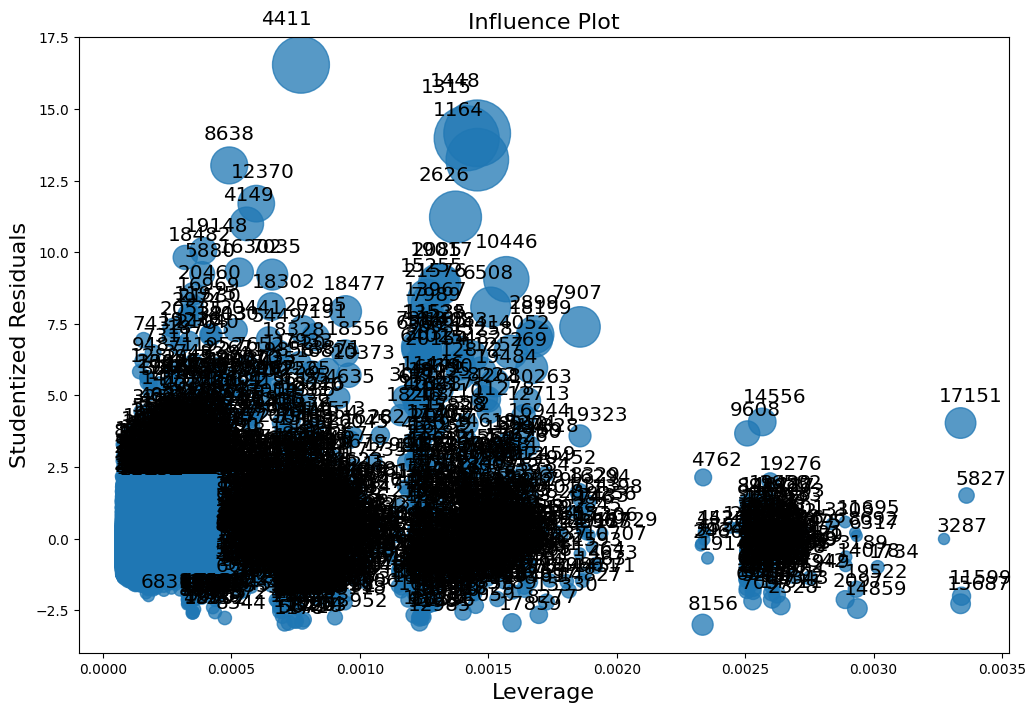

In [310]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [311]:
house=house.drop([2864,17151],axis=0)

KeyError: '[2864] not found in axis'

In [309]:
results = ols("price ~ view+ sqft_living_log + new_renovated+condition", data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     4445.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:59:57   Log-Likelihood:            -3.0036e+05
No. Observations:               21604   AIC:                         6.007e+05
Df Residuals:                   21599   BIC:                         6.008e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.124e+06   3.48e+04    -